In [4]:
import h5py
import json
import random
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
from wandb.keras import WandbMetricsLogger
import pydicom
sys.path.append('./src')
import numpy as np
import json
import tensorflow as tf
import seaborn as sns

In [5]:
path = r"/tudelft.net/staff-umbrella/simelectrons/OneGeometryMultipleEnergyMultipleSpread"
test_df=pd.read_pickle(os.path.join(path,'test_picklefile.pkl'))

testIDs=test_df['cropped_geometry_name'].tolist()

with open('../scale_mpe_mps.json', 'r') as file:
    scale_json = file.read()
scale = json.loads(scale_json)

In [64]:
complete_data=pd.read_excel(os.path.join(path,'complete_data.xlsx'))

In [65]:
complete_data['RMSE [Gy]']=complete_data['RMSE [Gy]'].values*1e4
complete_data['RMSE Masked (0.1%) [Gy]']=complete_data['RMSE Masked (0.1%) [Gy]'].values*1e4

In [76]:
complete_data.drop(columns=['Unnamed: 0'],inplace=True)

In [77]:
complete_data

,text_file_names,dose_file_names,Energy [MeV],beam coordinates,angles,Positional Spead [cm],ct_name,cropped_dose_name,cropped_geometry_name,shape,...,mean HU Geometry [HU],Spread HU Geometry [HU],Max HU Geometry [HU],RMSE Masked (0.1%) [Gy],Relative Error Masked (0.1%),"GPR (1%,3mm) [%]",GPR_Section_1,GPR_Section_2,GPR_Section_3,GPR_Section_4
0,9.000000-Venous_Phase__5.0__B30f-43947.txt,9.000000-Venous_Phase__5.0__B30f-43947_Run_0003,378.350985,"(16.6, -5.0, -7.7)","(0, 90)",0.465590,9.000000-Venous_Phase__5.0__B30f-43947,5b5d8ba3-c080-4675-ba8a-1c78be44a309,1ecba431-44c2-44c2-babc-222e6db1fbb2,"(68, 68, 150)",...,-444.513042,482.616073,1031,5.100169,2.651,97.963,98.159,97.795,97.808,98.069
1,9.000000-Venous_Phase__5.0__B30f-43947.txt,9.000000-Venous_Phase__5.0__B30f-43947_Run_0005,163.860641,"(16.6, -3.0, -7.7)","(0, 90)",0.372940,9.000000-Venous_Phase__5.0__B30f-43947,b8717b42-59a8-4b30-99e7-826c365a23fb,734f01a6-9f81-4f54-b9de-9f1ba7f7e9a0,"(68, 68, 150)",...,-301.403303,454.481754,1252,4.980161,2.075,98.820,97.713,98.037,99.132,99.780
2,9.000000-Venous_Phase__5.0__B30f-43947.txt,9.000000-Venous_Phase__5.0__B30f-43947_Run_0008,368.009319,"(16.6, 0.0, -7.7)","(0, 90)",0.272400,9.000000-Venous_Phase__5.0__B30f-43947,89cab531-a42c-4097-8bfc-53ab7a7db469,0c004051-2e7b-44d2-9951-5767fcd19858,"(68, 68, 150)",...,-141.215529,374.865474,1399,5.005504,1.661,98.849,97.804,96.959,99.454,99.882
3,9.000000-Venous_Phase__5.0__B30f-43947.txt,9.000000-Venous_Phase__5.0__B30f-43947_Run_0021,124.973246,"(-16.6, -5.0, -7.7)","(0, 270)",0.168727,9.000000-Venous_Phase__5.0__B30f-43947,1db7f740-b18c-4260-aa87-7c3fc7fba5fe,42f395c4-49cf-437b-afe4-10f2e5f68632,"(68, 68, 150)",...,-446.856564,482.800628,1031,7.313123,1.230,99.168,98.649,98.435,100.000,99.391
4,9.000000-Venous_Phase__5.0__B30f-43947.txt,9.000000-Venous_Phase__5.0__B30f-43947_Run_0025,126.434695,"(-16.6, -1.0, -7.7)","(0, 270)",0.458830,9.000000-Venous_Phase__5.0__B30f-43947,11bf2463-31a6-4120-a316-2d10d82c791a,a71e103a-c1db-418b-9cc1-a5899f01f4da,"(68, 68, 150)",...,-183.577478,401.782068,1399,4.510222,2.174,99.321,98.757,99.575,99.954,97.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,8.000000-Abdomen__5.0__B30f-52754.txt,8.000000-Abdomen__5.0__B30f-52754_Run_2755,114.706904,"(-8.4, 19.2, 6.3)","(270, 0)",0.447834,8.000000-Abdomen__5.0__B30f-52754,b5440af8-d374-44da-a21d-d002f437faa0,02c9423f-9e73-4da3-8c00-c0e2c3215b8c,"(68, 68, 150)",...,-378.946246,464.528156,1048,5.130573,2.568,99.627,99.318,99.265,99.954,99.810
5130,8.000000-Abdomen__5.0__B30f-52754.txt,8.000000-Abdomen__5.0__B30f-52754_Run_2757,200.154843,"(-6.4, 19.2, 6.3)","(270, 0)",0.452317,8.000000-Abdomen__5.0__B30f-52754,6c0dbb8f-35a1-495c-8803-5582b0e9cf68,19774a28-d054-428f-acb5-f71543cb64f2,"(68, 68, 150)",...,-314.247235,454.822411,1048,4.968154,2.780,99.280,98.480,99.103,99.837,99.433
5131,8.000000-Abdomen__5.0__B30f-52754.txt,8.000000-Abdomen__5.0__B30f-52754_Run_2762,225.024915,"(-1.4, 19.2, 6.3)","(270, 0)",0.232362,8.000000-Abdomen__5.0__B30f-52754,ebdc3e9e-031d-43e9-824a-fb7d85c438ad,5081be0f-894d-45f1-9950-209a78f4e6c5,"(68, 68, 150)",...,-283.830996,445.861554,856,6.665011,1.740,97.823,96.622,95.610,98.859,98.945
5132,8.000000-Abdomen__5.0__B30f-52754.txt,8.000000-Abdomen__5.0__B30f-52754_Run_2774,273.480172,"(10.6, 19.2, 6.3)","(270, 0)",0.457579,8.000000-Abdomen__5.0__B30f-52754,36b89f9c-9181-4d54-9293-fdb6c36be543,48d37b53-641f-492d-9acb-6af302ca5e16,"(68, 68, 150)",...,-463.215324,461.453170,935,5.058760,2.834,99.035,98.232,98.675,99.852,99.255


<h2> Descriptive Statistics </h2>

In [78]:
complete_data.describe()

,Energy [MeV],Positional Spead [cm],Relative Error [%],RMSE [Gy],max_pred [Gy],max_gt [Gy],mean HU Geometry [HU],Spread HU Geometry [HU],Max HU Geometry [HU],RMSE Masked (0.1%) [Gy],Relative Error Masked (0.1%),"GPR (1%,3mm) [%]",GPR_Section_1,GPR_Section_2,GPR_Section_3,GPR_Section_4
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,251.013181,0.298969,0.349091,0.001043,0.000065,0.000068,-379.469014,461.862103,1343.521231,10.431052,2.176518,97.796698,95.362664,96.933105,98.721511,98.858449
std,86.231907,0.114461,0.194764,0.000855,0.000044,0.000047,146.949152,39.078693,564.043721,8.547632,0.542375,2.692471,6.911211,4.571504,2.342800,2.063239
min,100.031350,0.100290,0.064197,0.000438,0.000019,0.000020,-806.947203,275.194997,123.000000,4.376447,0.759000,73.465000,50.000000,50.000000,71.094000,67.346000
25%,176.573022,0.202048,0.176046,0.000583,0.000030,0.000031,-481.373955,444.608015,1045.000000,5.834183,1.774250,97.601750,95.053750,96.697250,98.482250,98.744250
50%,251.115645,0.296514,0.305879,0.000742,0.000050,0.000051,-375.585509,472.977213,1262.000000,7.417353,2.189000,98.688000,97.804000,98.395000,99.518000,99.506500
75%,325.431179,0.397952,0.497014,0.001119,0.000090,0.000092,-273.848687,489.653041,1437.000000,11.187956,2.578750,99.236000,98.902000,99.314000,99.928000,99.866000
max,399.988217,0.499605,0.980497,0.010180,0.000188,0.000282,-36.549765,519.869315,3070.000000,101.797105,4.422000,100.000000,100.000000,100.000000,100.000000,100.000000


<h2> Descriptive histograms </h2>

In [89]:
import ipywidgets as widgets
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_complete_plus' is your DataFrame
# Replace 'df_complete_plus' with 'complete_data' if that's the correct DataFrame name
relevant_columns=['RMSE [Gy]', 'RMSE Masked (0.1%) [Gy]', 'GPR (1%,3mm) [%]','Relative Error [%]','Relative Error Masked (0.1%)']

Titles={'RMSE [Gy]':'RMSE [Gy]','RMSE Masked (0.1%) [Gy]':'RMSE Masked (0.1%) [Gy]','GPR (1%,3mm) [%]':'GPR (1%,3mm) [%]','Relative Error [%]':'Relative Error [%]','Relative Error Masked (0.1%)':'Relative Error Masked (0.1%)'}
def plot_histogram(column):
    # Set the aesthetic style of the plots
    sns.set_style('whitegrid')

    # Create a larger figure size for better readability
    plt.figure(figsize=(10, 6))

    # Plotting the histogram
    ax = sns.histplot(complete_data[column], bins=100, color='skyblue', kde=False)

    # Calculate the mean
    mean_value = complete_data[column].mean()

    # Add a vertical line for the mean
    plt.axvline(mean_value, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

    # Customize the plot with labels, title, and limits
    ax.set_xlabel(Titles[column], fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title(f'Distribution of {column}', fontsize=16)
    plt.xlim([complete_data[column].min(), complete_data[column].max()])
    plt.ylim([0, None])  # Auto-adjusts the maximum y-value

    ax.tick_params(axis='x', labelsize=12, labelcolor='black', width=2, length=6)
    ax.tick_params(axis='y', labelsize=12, labelcolor='black', width=2, length=6)
    # Add legend to show what the red line represents
    plt.legend()

    # Remove the top and right spines
    sns.despine()

    # Show the plot
    plt.show()

# Create a dropdown for the column selection
column_dropdown = widgets.Dropdown(
    options=list(relevant_columns),  # List of column names
    value=list(relevant_columns)[0],  # Default value
    description='Column:',
    disabled=False,
)

# Create an interactive widget
widgets.interactive(plot_histogram, column=column_dropdown)


interactive(children=(Dropdown(description='Column:', options=('RMSE [Gy]', 'RMSE Masked (0.1%) [Gy]', 'GPR (1…

<h2> GPR Over depth </h2>

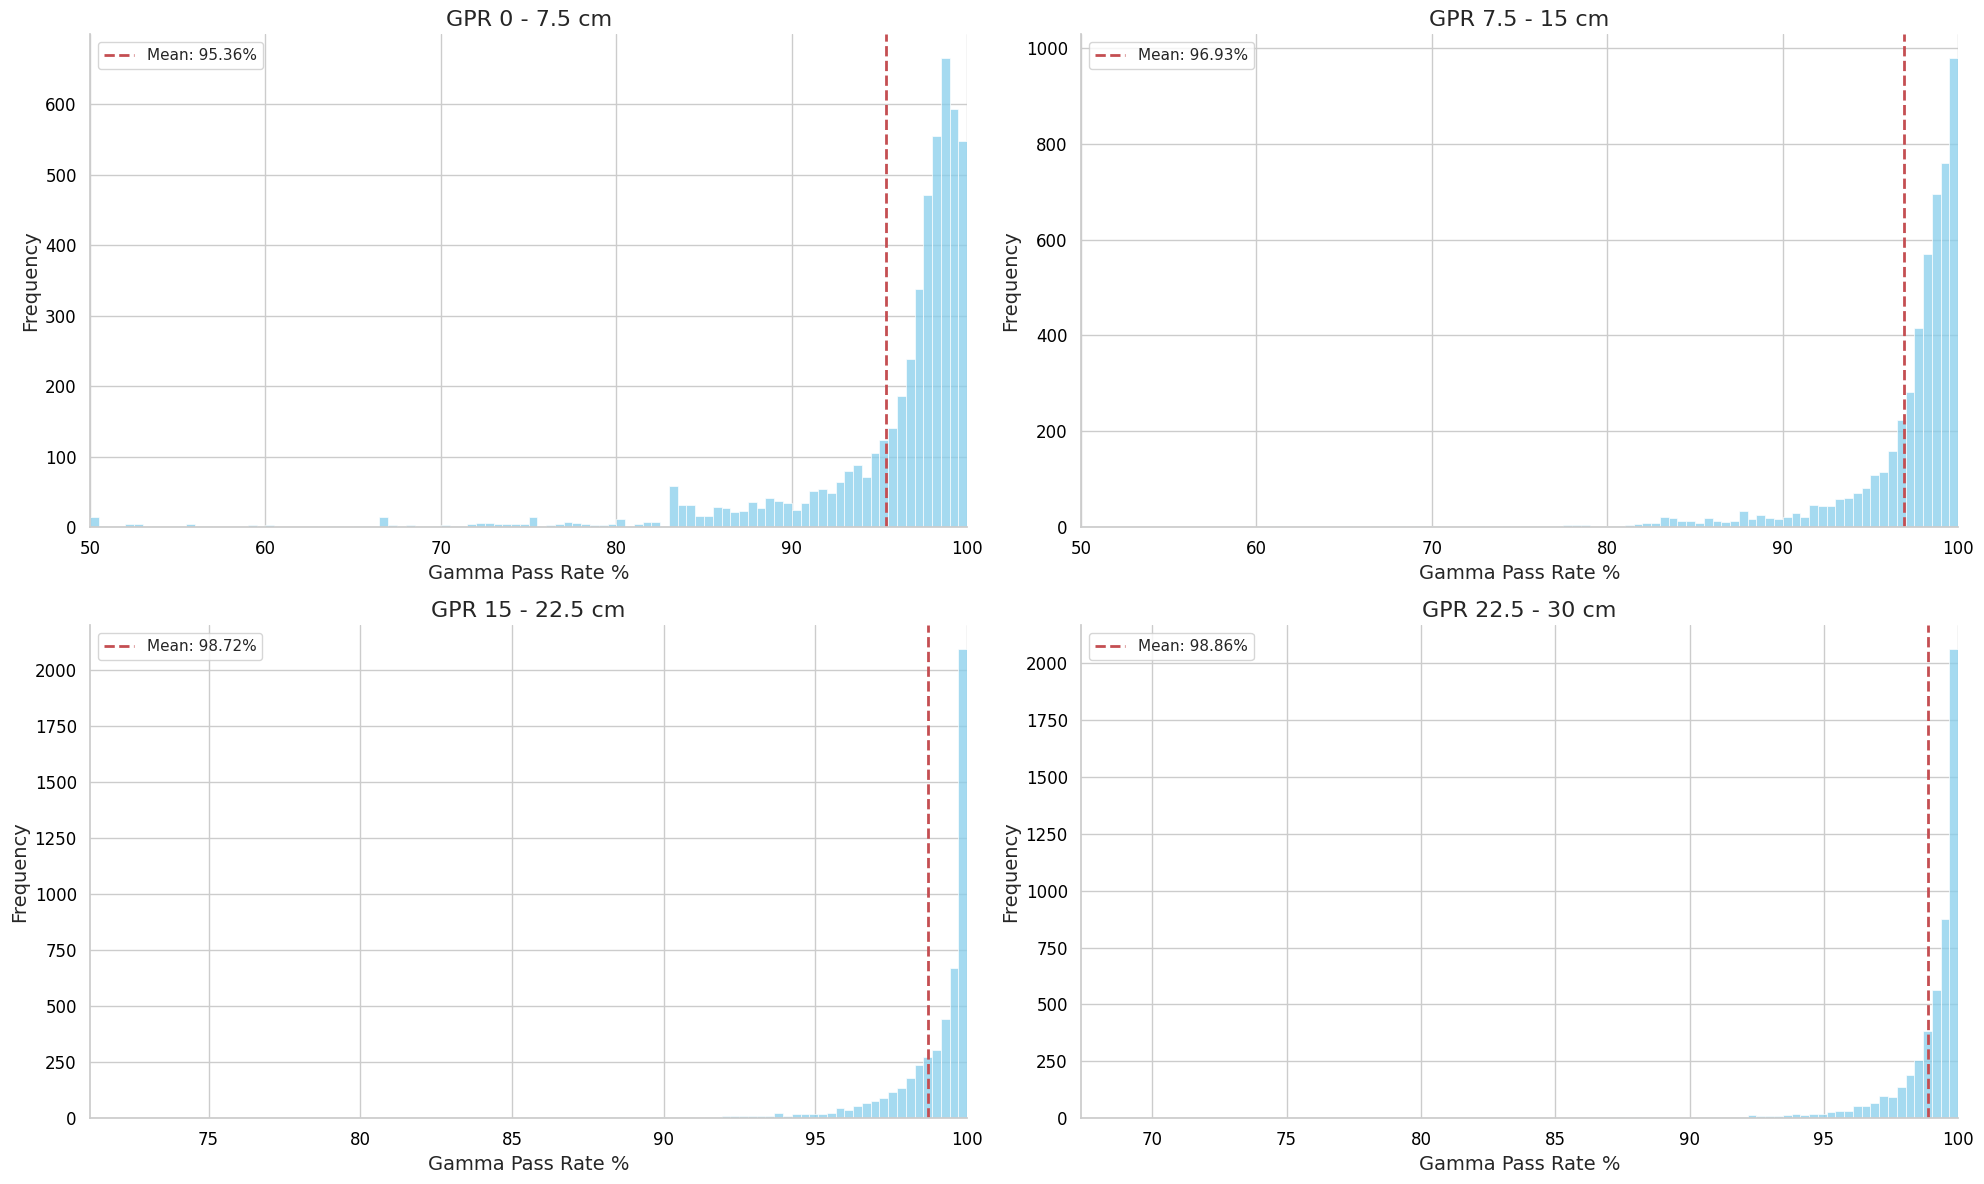

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_complete_plus is your DataFrame

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the axs array for easy looping
axs = axs.flatten()

# Column names for the GPR Sections
gpr_sections = ['GPR_Section_1', 'GPR_Section_2', 'GPR_Section_3', 'GPR_Section_4']
column_names=['GPR 0 - 7.5 cm','GPR 7.5 - 15 cm','GPR 15 - 22.5 cm','GPR 22.5 - 30 cm']
for i, section in enumerate(gpr_sections):
    # Plotting histogram for each section
    ax = sns.histplot(complete_data[section], bins=100, color='skyblue', kde=False, ax=axs[i])
    
    # Calculate the mean of the current section
    mean_value = complete_data[section].mean()
    
    # Add a vertical line for the mean
    axs[i].axvline(mean_value, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}%')
    
    # Customize each subplot
    axs[i].set_xlabel('Gamma Pass Rate %', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].set_title(column_names[i], fontsize=16)
    axs[i].set_xlim([complete_data[section].min(), complete_data[section].max()])
    axs[i].set_ylim([0, None]) # Auto-adjusts the maximum y-value
    
    axs[i].tick_params(axis='x', labelsize=12, labelcolor='black', width=2, length=6)
    axs[i].tick_params(axis='y', labelsize=12, labelcolor='black', width=2, length=6)
    
    # Add legend to show what the red line represents
    axs[i].legend()

# Adjust layout to not overlap subplots
plt.tight_layout()

# Remove the top and right spines from all plots
sns.despine()

# Finally, show the plots
plt.show()


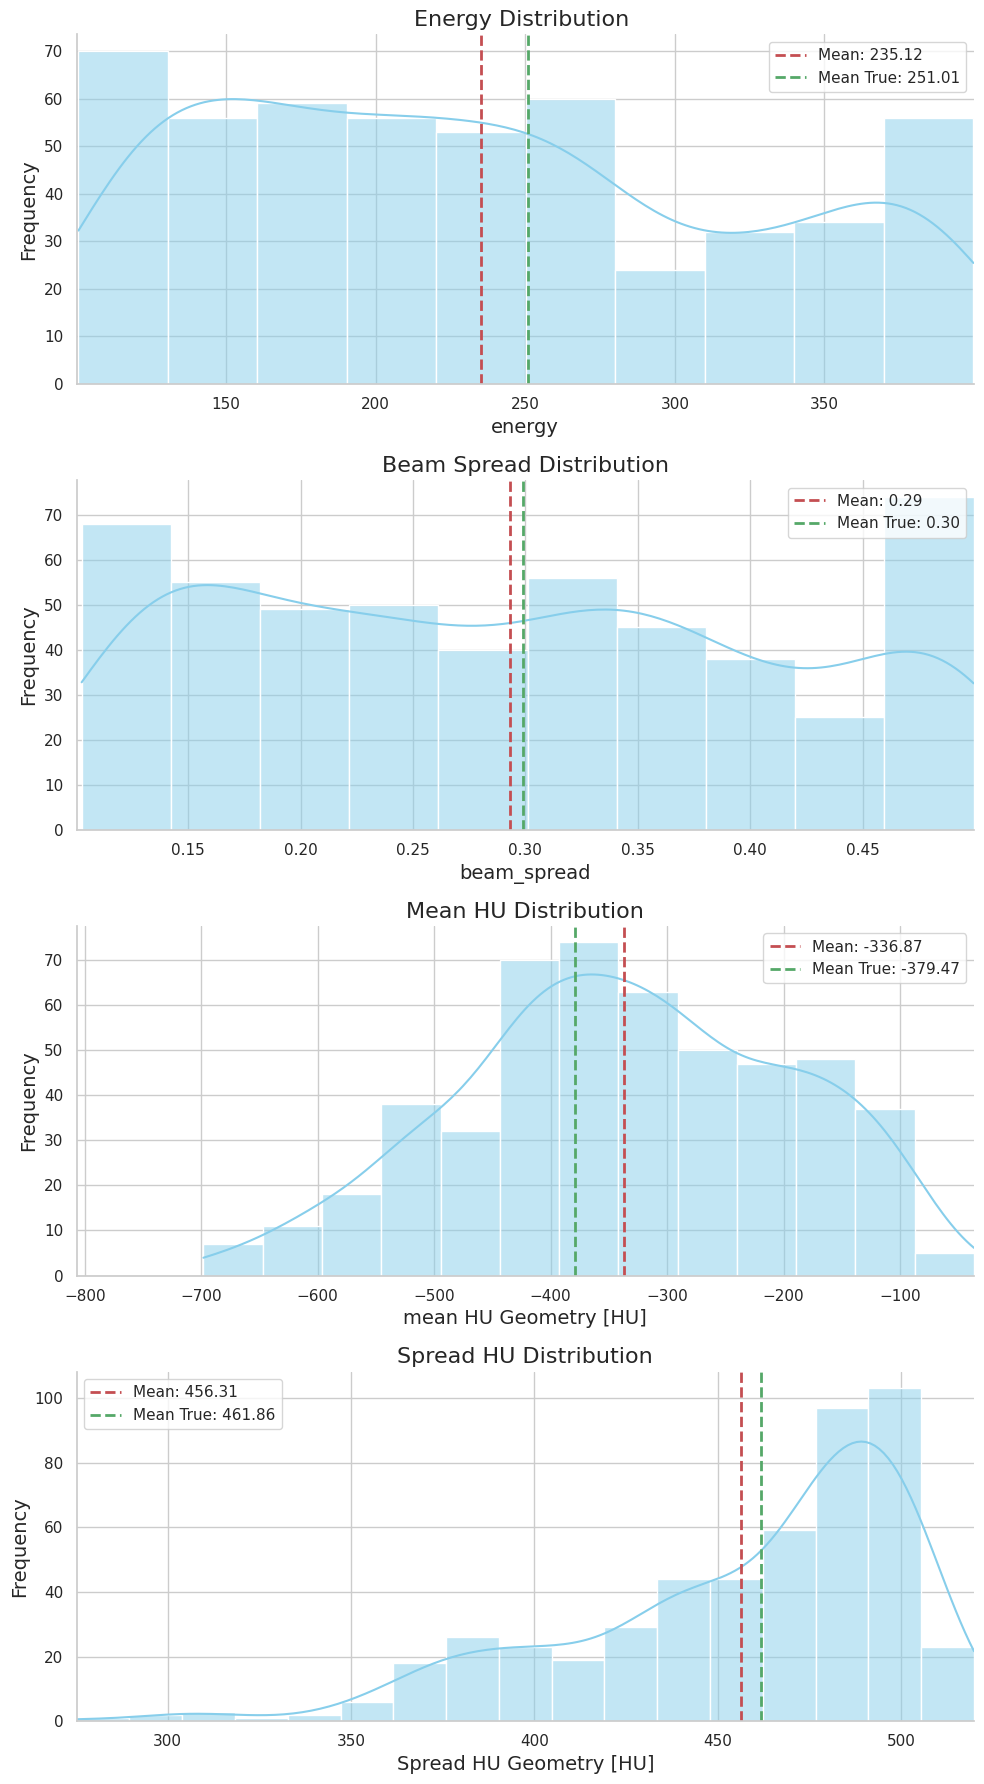

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming worst_performing is your DataFrame containing the 100 worst-performing records
worst_performing = complete_data.nlargest(500, 'GPR (1%,3mm) [%]')

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a larger figure for subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Titles for each subplot
titles = ['Energy Distribution ','Beam Spread Distribution', 'Mean HU Distribution', 'Spread HU Distribution']

# Features to plot
features = ['energy','beam_spread', 'mean HU Geometry [HU]', 'Spread HU Geometry [HU]']

for ax, feature, title in zip(axs, features, titles):
    sns.histplot(worst_performing[feature], bins='auto', kde=True, color='skyblue', ax=ax)
    
    # Calculate the mean of the current feature
    mean_value = worst_performing[feature].mean()
    mean_value_true = complete_data[feature].mean()
    
    # Add a vertical line for the mean
    ax.axvline(mean_value, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.axvline(mean_value_true, color='g', linestyle='--', linewidth=2, label=f'Mean True: {mean_value_true:.2f}')
    
    # Customize the subplot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_xlim(complete_data[feature].min(), complete_data[feature].max())
    ax.set_ylabel('Frequency', fontsize=14)
    ax.legend()

# Adjust layout to not overlap subplots
plt.tight_layout()

# Remove the top and right spines from all plots
sns.despine()

# Finally, show the plot
plt.show()


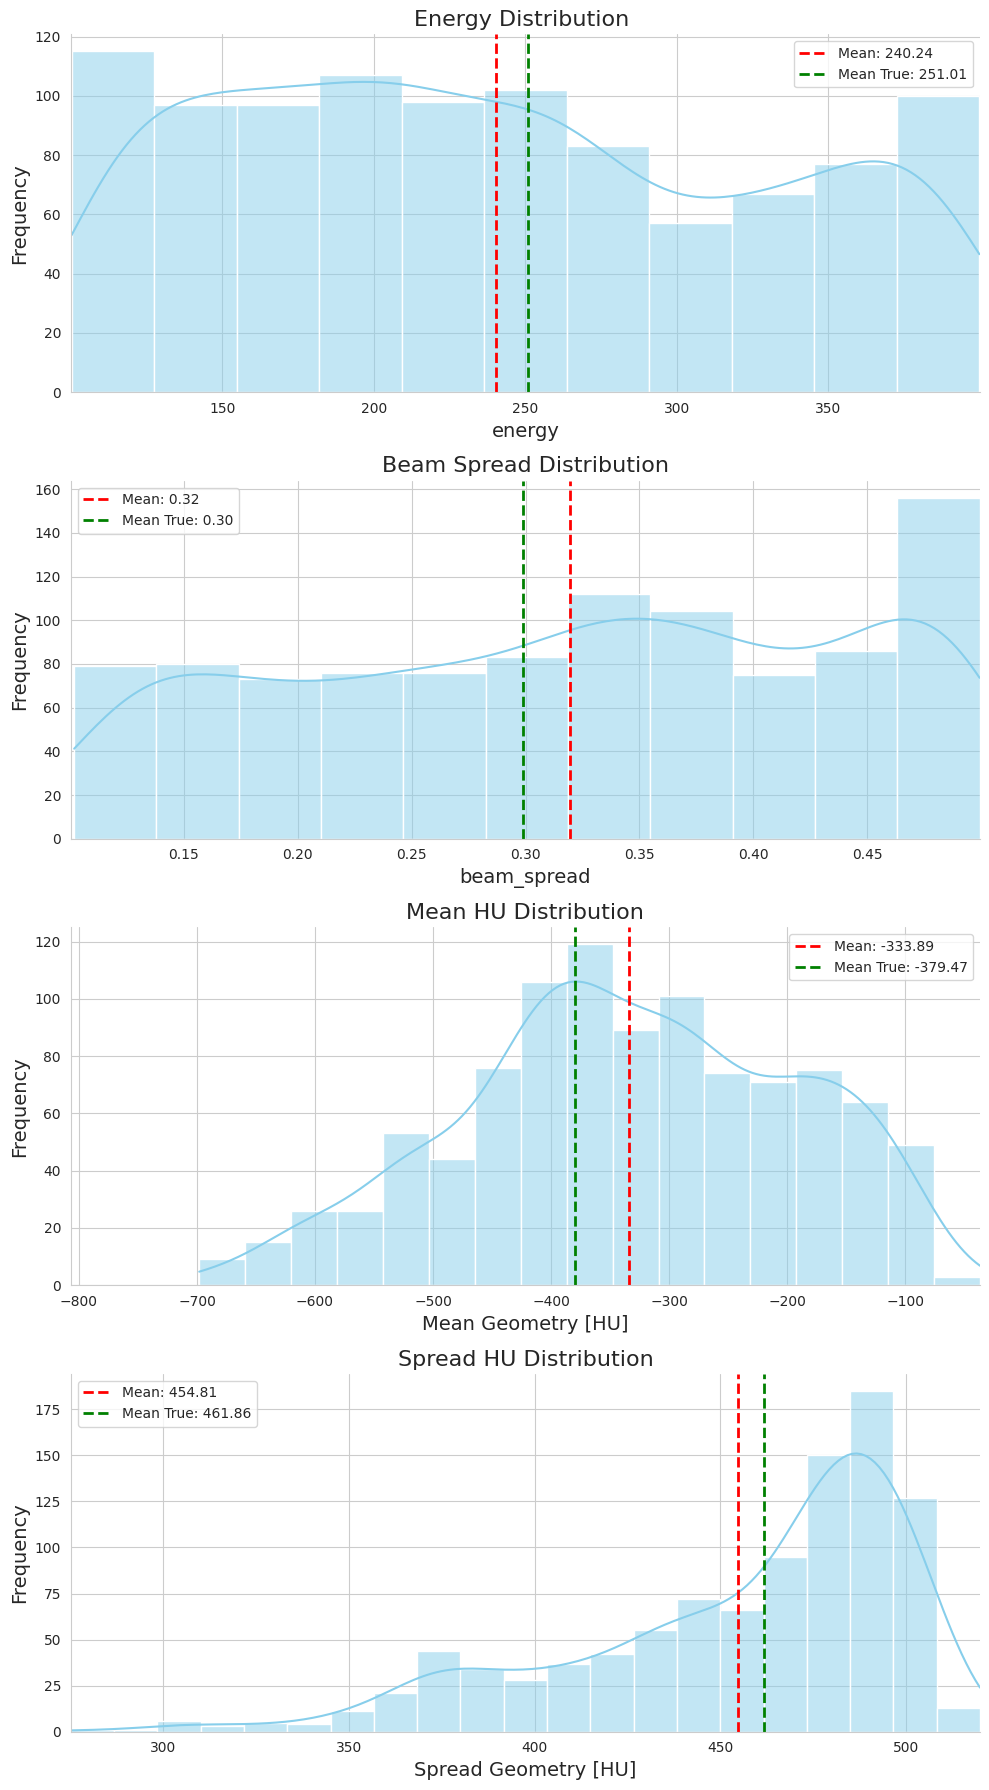

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming worst_performing is your DataFrame containing the 100 worst-performing records
best_preforming = df_complete.nlargest(1000, 'GPR_10_Procent')

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a larger figure for subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Titles for each subplot
titles = ['Energy Distribution ','Beam Spread Distribution', 'Mean HU Distribution', 'Spread HU Distribution']

# Features to plot
features = ['energy','beam_spread', 'Mean Geometry [HU]', 'Spread Geometry [HU]']

for ax, feature, title in zip(axs, features, titles):
    sns.histplot(best_preforming[feature], bins='auto', kde=True, color='skyblue', ax=ax)
    
    # Calculate the mean of the current feature
    mean_value = best_preforming[feature].mean()
    mean_value_true=df_complete[feature].mean()
    
    # Add a vertical line for the mean
    ax.axvline(mean_value, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.axvline(mean_value_true, color='g', linestyle='--', linewidth=2, label=f'Mean True: {mean_value_true:.2f}')
    
    # Customize the subplot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_xlim(df_complete[feature].min(), df_complete[feature].max())
    ax.set_ylabel('Frequency', fontsize=14)
    ax.legend()

# Adjust layout to not overlap subplots
plt.tight_layout()

# Remove the top and right spines from all plots
sns.despine()

# Finally, show the plot
plt.show()


<h2> Beam charachteristics vs Metrics </h2>

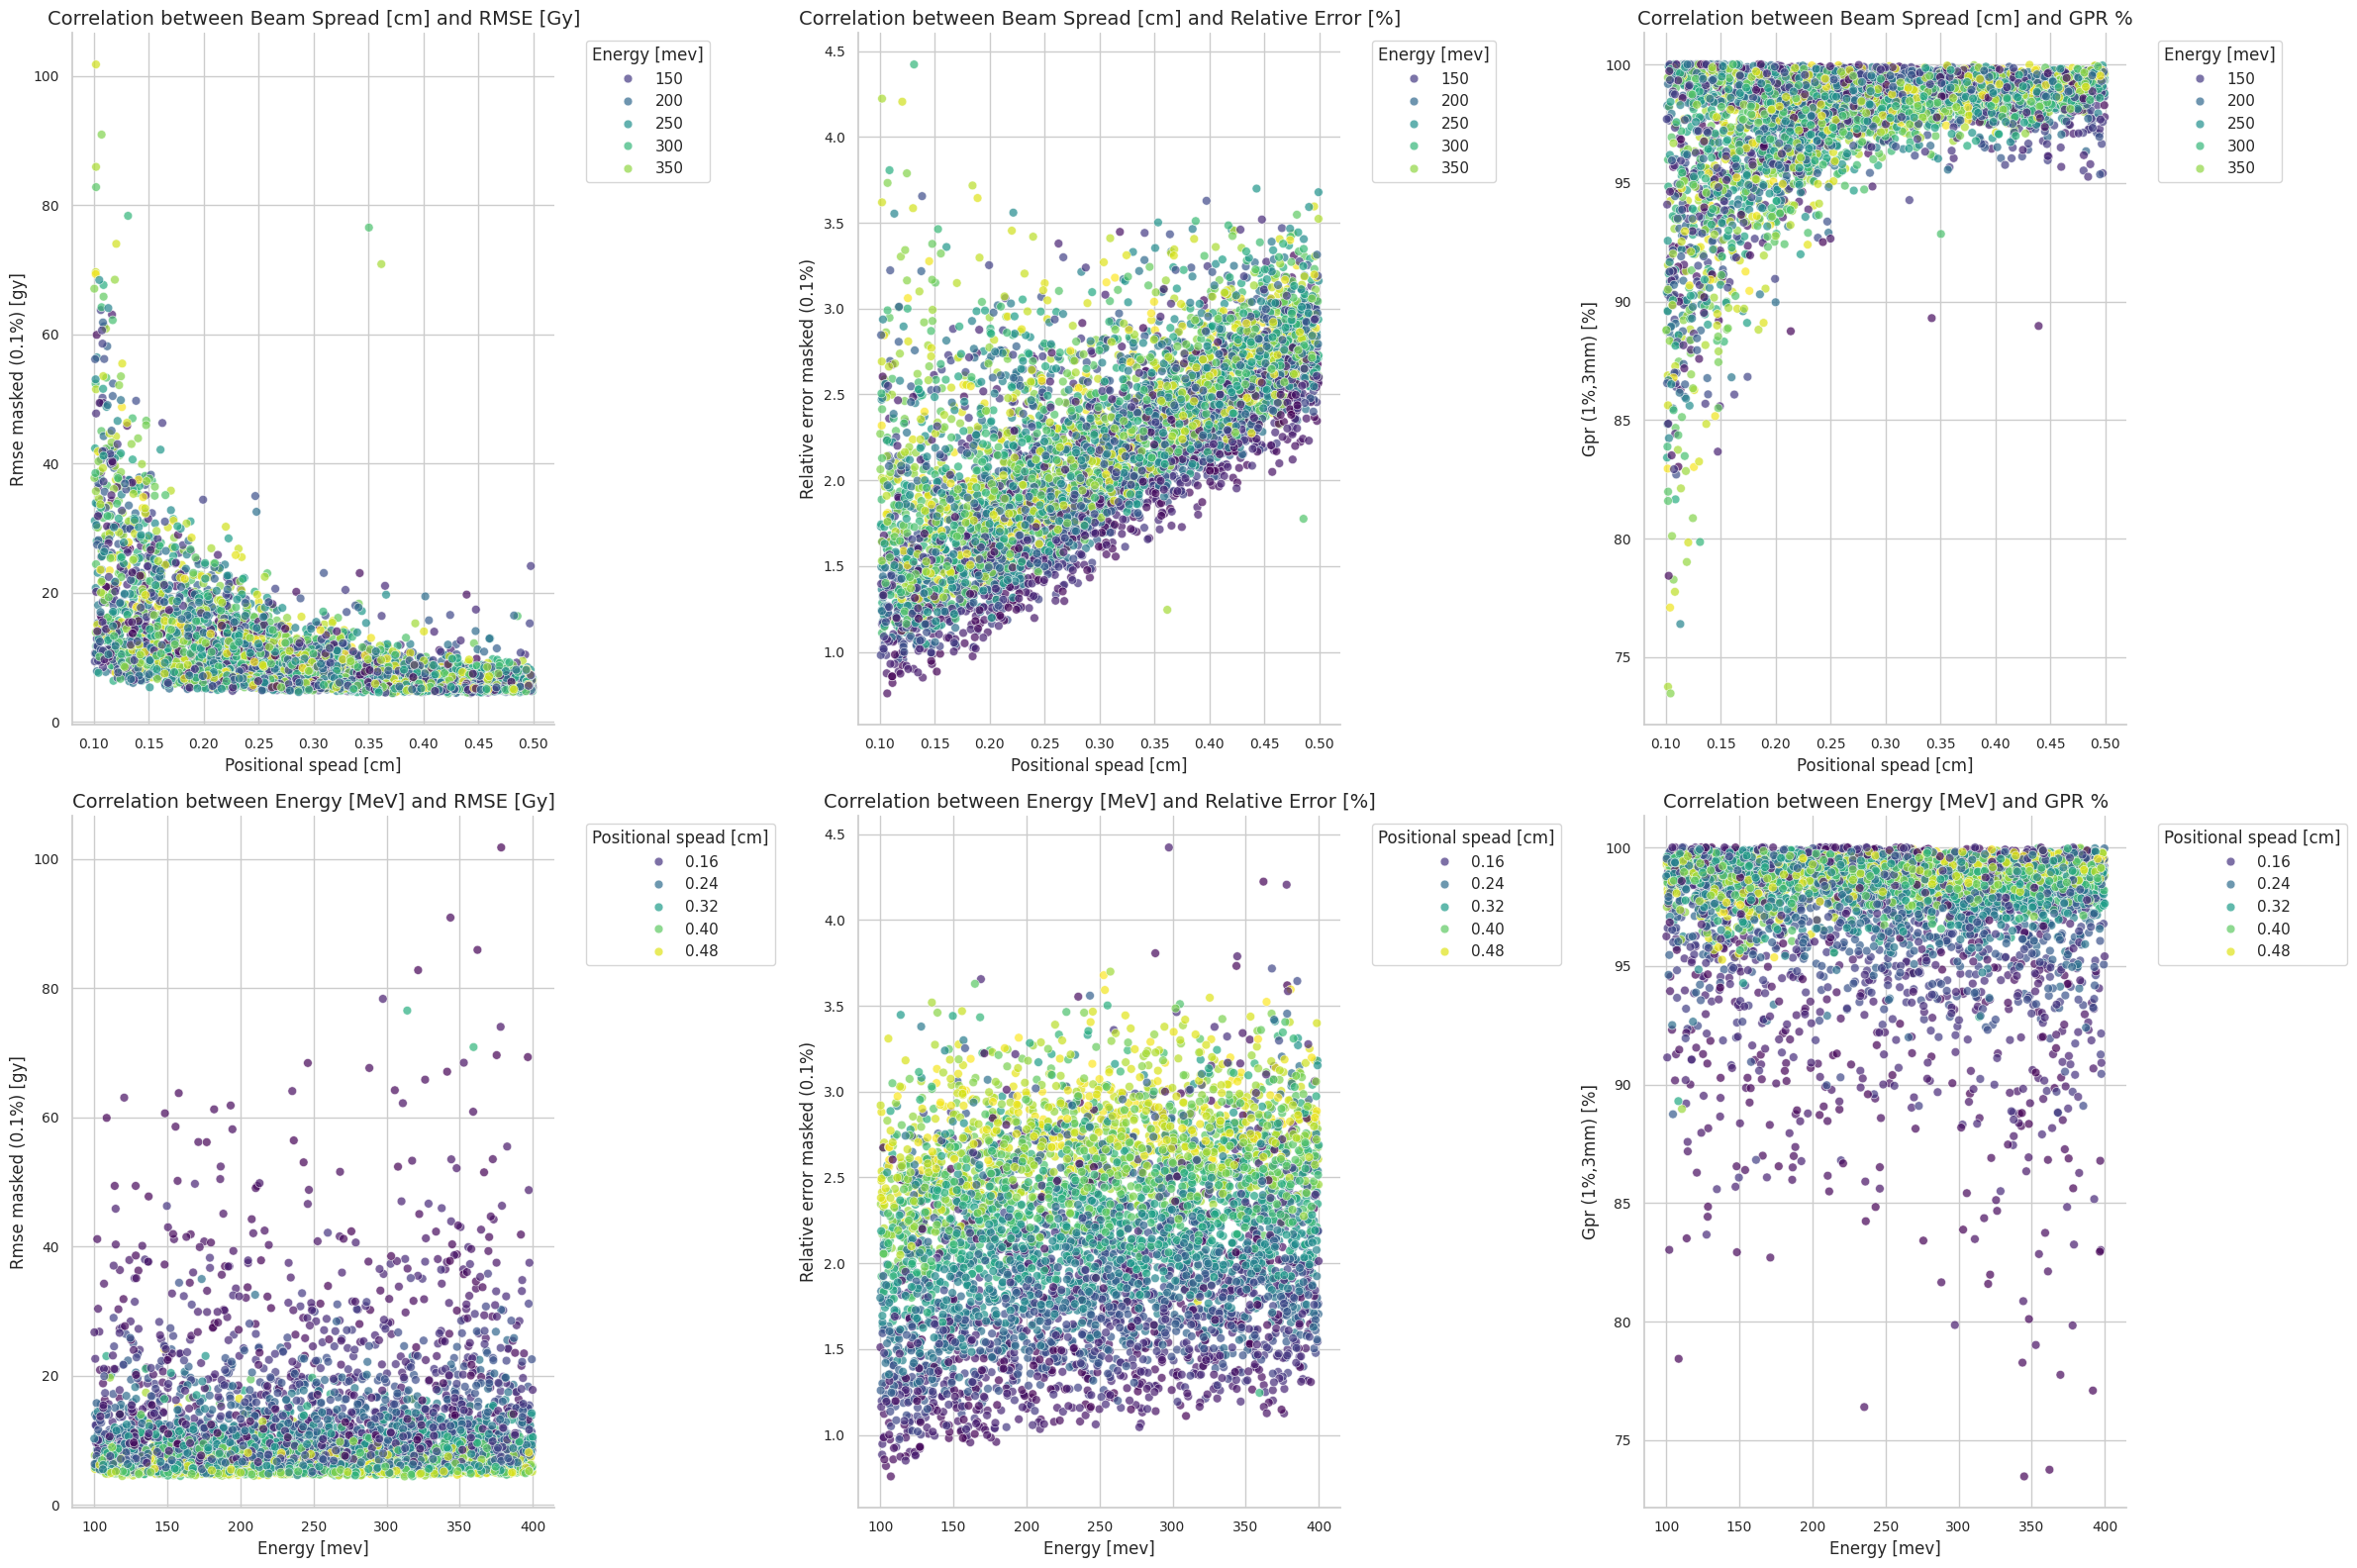

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming complete_data is your DataFrame

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create figure and axes for a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(24, 16))

# Define the columns for the x-axis
x_cols = ['Positional Spead [cm]', 'Energy [MeV]']

# Define the columns for the y-axis and their corresponding hue
y_cols = ['RMSE Masked (0.1%) [Gy]', 'Relative Error Masked (0.1%)', 'GPR (1%,3mm) [%]']
hue_cols = {'Positional Spead [cm]': 'Energy [MeV]', 'Energy [MeV]': 'Positional Spead [cm]'}  # Mapping x_col to hue

# Titles for the subplots
titles = [
    'Correlation between Beam Spread [cm] and RMSE [Gy]',
    'Correlation between Beam Spread [cm] and Relative Error [%]',
    'Correlation between Beam Spread [cm] and GPR %',
    'Correlation between Energy [MeV] and RMSE [Gy]',
    'Correlation between Energy [MeV] and Relative Error [%]',
    'Correlation between Energy [MeV] and GPR %'
]

# Loop through the grid and create each plot
for i in range(2):
    for j in range(3):
        # Determine the hue based on the current x-axis column
        current_x_col = x_cols[i % 2]
        hue = hue_cols[current_x_col]
        
        sns.scatterplot(x=current_x_col, y=y_cols[j], hue=hue, data=complete_data, 
                        s=40, edgecolor='w', alpha=0.7, ax=axs[i, j], palette='viridis')
        axs[i, j].set_xlabel(current_x_col.capitalize(), fontsize=12)
        axs[i, j].set_ylabel(y_cols[j].replace('_', ' ').capitalize(), fontsize=12)
        axs[i, j].set_title(titles[i * 3 + j], fontsize=14)
        axs[i, j].tick_params(axis='both', which='major', labelsize=10)
        # Adjust legend for clarity
        axs[i, j].legend(title=hue.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
        sns.despine(ax=axs[i,j])

plt.tight_layout()
plt.show()


In [99]:
RMSEs=complete_data['RMSE [Gy]'].tolist()
relative_errors=complete_data['Relative Error [%]'].tolist()
GPR=complete_data['GPR (1%,3mm) [%]'].tolist()
relative_errors_masked=complete_data['Relative Error Masked (0.1%)'].tolist()
RMSEs_masked=complete_data['RMSE Masked (0.1%) [Gy]'].tolist()

def find_indices(arr):
    sorted_indices = np.argsort(arr)
    lowest_index = sorted_indices[0]
    highest_index = sorted_indices[-1]
    median_index = sorted_indices[len(arr) // 2]
    return lowest_index, highest_index, median_index

lowest_relative_error, highest_relative_error, median_relative_error = find_indices(np.array(relative_errors))
lowest_RMSE, highest_RMSE, median_RMSE = find_indices(np.array(RMSEs))
lowest_GPR, highest_GPR, median_GPR = find_indices(np.array(GPR))
lowest_relative_error_masked, highest_relative_error_masked, median_relative_error_masked = find_indices(np.array(relative_errors_masked))
lowest_RMSE_masked, highest_RMSE_masked, median_RMSE_masked = find_indices(np.array(RMSEs_masked))


print(lowest_relative_error, highest_relative_error, median_relative_error)
print(lowest_RMSE, highest_RMSE, median_RMSE)
print(lowest_GPR, highest_GPR, median_GPR)
print(lowest_relative_error_masked, highest_relative_error_masked, median_relative_error_masked)
print(lowest_RMSE_masked, highest_RMSE_masked, median_RMSE_masked)


663 1215 1067
4900 896 117
3475 1354 4211
2228 1008 1958
4900 896 117


In [122]:
def get_plot_inputs(metric):
    if metric=='random':
        metric=np.random.randint(0,len(complete_data))
    path = r"/tudelft.net/staff-umbrella/simelectrons/OneGeometryMultipleEnergyMultipleSpread"

    filename=complete_data['cropped_geometry_name'].values[metric]

    prediction = np.load(os.path.join(path, 'Prediction', filename + '.npy'))
    ground_truth = np.load(os.path.join(path, 'GroundTruth', filename + '.npy'))
    geometry = np.load(os.path.join(path, 'Geometry', filename + '.npy'))


    return geometry, ground_truth, prediction

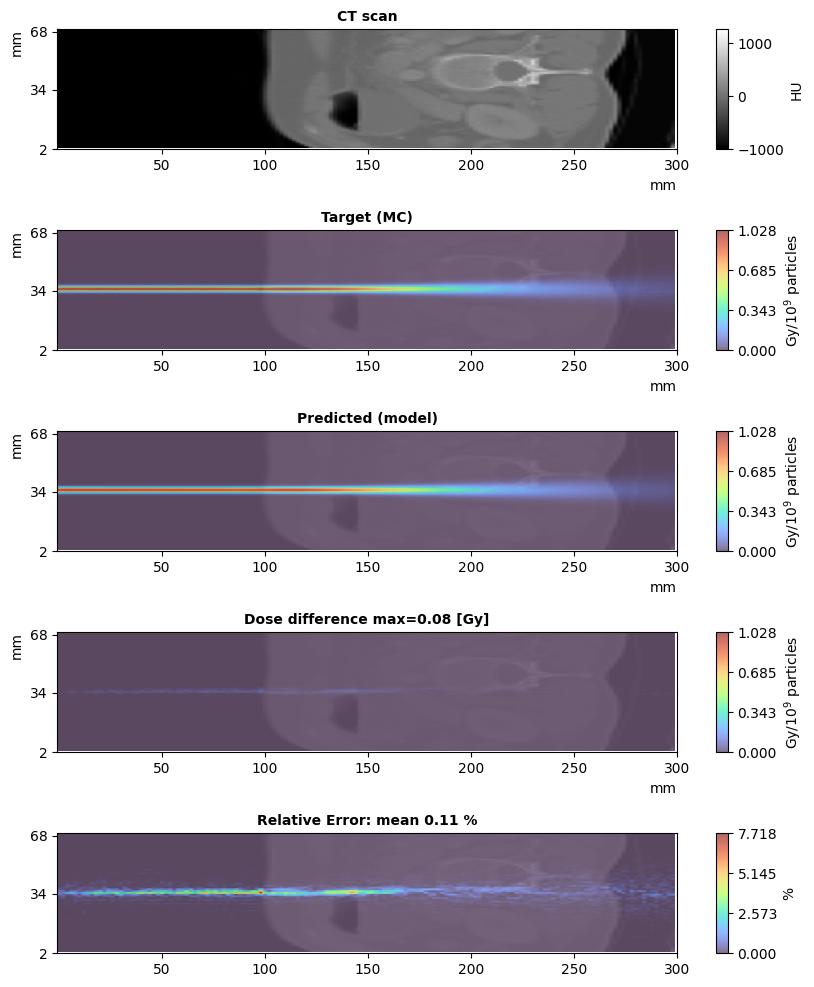

In [124]:
geometry, ground_truth, prediction = get_plot_inputs(highest_GPR)
plot_slice(geometry, ground_truth, prediction)

In [118]:
import matplotlib.pyplot as plt
def plot_slice(inputs, ground_truth, outputs, dose_threshold=1,
    distance_threshold=3, cutoff=0, figsize=(10,12), fontsize=10,
    resolution=[2,2,2], gamma_slice=False, savefig=False):
    """
    Plots slices of the full beam along the Z axis.
    *inputs..........3D array [Y,X,Z] from function infer
    """
    # Initialize figure and axes.
    fig, axs = plt.subplots(5, 1, figsize=figsize)
    axs[0].set_title("CT scan", fontsize=fontsize, fontweight='bold')
    axs[1].set_title("Target (MC)", fontsize=fontsize, fontweight='bold')
    axs[2].set_title("Predicted (model)", fontsize=fontsize, fontweight='bold')
    
    plt.subplots_adjust(hspace=0.675, wspace=0.0675)
    
    ground_truth[ground_truth<(cutoff/100)*scale['y_max']] = 0
    outputs[outputs<(cutoff/100)*scale['y_max']] = 0

    ground_truth=ground_truth* (1e9 / 1e5)
    outputs=outputs* (1e9 / 1e5)
    
    # Cut off MC noise

    

    # Calculate maximum and minimum per column.
    min_input, max_input = np.min(inputs), np.max(inputs)
    min_output, max_output = min(np.min(outputs),np.min(ground_truth)), max(np.max(outputs),np.max(ground_truth))
    min_ground_truth, max_ground_truth = np.min(ground_truth), np.max(ground_truth)
    slice_number = int(np.floor(ground_truth.shape[-1]/2))
    cb_ticks=np.linspace(0, max_output, num=4)
    # 1st row: input values
    cbh0 = axs[0].imshow(np.transpose(inputs[:,:,slice_number]), aspect='auto',
        cmap='gray', vmin=min_input, vmax=max_input)
    plt.sca(axs[0])
    plt.yticks([68,34,1], ['2','34','68'], fontsize=fontsize)
    plt.xticks([25, 50, 75, 100, 125, 150], ['50', '100', '150', '200', '250', '300'], fontsize=fontsize)
    axs[0].set_ylabel("mm", loc='top', fontsize=fontsize)
    axs[0].set_xlabel("mm", loc='right', fontsize=fontsize)
    cb0 = fig.colorbar(cbh0, ax=axs[0], aspect=fontsize)
    cb0.ax.set_ylabel("HU", size=fontsize)
    cb0.ax.tick_params(labelsize=fontsize)

    # 2nd row: ground truth
    axs[1].imshow(np.transpose(inputs[:,:,slice_number]), aspect='auto',
        cmap='gray', alpha=0.4, vmin=min_input, vmax=max_input)
    cbh1 = axs[1].imshow(np.transpose(ground_truth[:,:,slice_number]), aspect='auto',
        cmap='turbo', alpha=0.6, vmin=min_output, vmax=max_output)
    plt.sca(axs[1])
    plt.yticks([68,34,1], ['2','34','68'], fontsize=fontsize)
    plt.xticks([25, 50, 75, 100, 125, 150], ['50', '100', '150', '200', '250', '300'], fontsize=fontsize)
    axs[1].set_ylabel("mm", loc='top', fontsize=fontsize)
    axs[1].set_xlabel("mm", loc='right', fontsize=fontsize)
    cb1 = fig.colorbar(cbh1, ax=axs[1], aspect=fontsize,ticks=cb_ticks)
    cb1.ax.set_ylabel(r"Gy/$10^9$ particles", size=fontsize)
    cb1.ax.tick_params(labelsize=fontsize)

    # 3rd row: model prediction
    axs[2].imshow(np.transpose(inputs[:,:,slice_number]), aspect='auto',
        cmap='gray', alpha=0.4, vmin=min_input, vmax=max_input)
    cbh2 = axs[2].imshow(np.transpose(outputs[:,:,slice_number]), aspect='auto', 
        cmap='turbo', alpha=0.6, vmin=min_output, vmax=max_output)
    plt.sca(axs[2])
    plt.yticks([68,34,1], ['2','34','68'], fontsize=fontsize)
    plt.xticks([25, 50, 75, 100, 125, 150], ['50', '100', '150', '200', '250', '300'], fontsize=fontsize)
    axs[2].set_ylabel("mm", loc='top', fontsize=fontsize)
    axs[2].set_xlabel("mm", loc='right', fontsize=fontsize)
    cb2 = fig.colorbar(cbh2, ax=axs[2], aspect=fontsize, ticks=cb_ticks)
    cb2.ax.set_ylabel(r"Gy/$10^9$ particles", size=fontsize)
    cb2.ax.tick_params(labelsize=fontsize)

    # 4th row: difference or gamma analysis results
    if gamma_slice:
        axes = (np.arange(ground_truth.shape[0])*resolution[0],
            np.arange(ground_truth.shape[1])*resolution[1],
            np.arange(ground_truth.shape[2])*resolution[2])
        gamma_values = np.nan_to_num(
            gamma(axes, ground_truth, axes, outputs, dose_threshold,
            distance_threshold, lower_percent_dose_cutoff=0.1, quiet=True), 0)
        axs[3].imshow(np.transpose(inputs[:,:,slice_number]), aspect='auto',
            cmap='gray', alpha=0.4, vmin=min_input, vmax=max_input)
        cbh3 = axs[3].imshow(np.transpose(np.absolute(gamma_values[:,:,slice_number])),
            aspect='auto', alpha=0.6, vmin=0, vmax=2, cmap='RdBu')

    else:
        axs[3].imshow(np.transpose(inputs[:,:,slice_number]), aspect='auto',
            cmap='gray', alpha=0.4, vmin=min_input, vmax=max_input)
        difference=np.transpose(np.absolute(ground_truth[:,:,slice_number]-outputs[:,:,slice_number]))
        cbh3 = axs[3].imshow(difference,
            aspect='auto', cmap='turbo', alpha=0.6, vmin=min_output, vmax=max_output)
        
    plt.sca(axs[3])
    plt.yticks([68,34,1], ['2','34','68'], fontsize=fontsize)
    plt.xticks([25, 50, 75, 100, 125, 150], ['50', '100', '150', '200', '250', '300'], fontsize=fontsize)
    axs[3].set_ylabel("mm", loc='top', fontsize=fontsize)
    axs[3].set_xlabel("mm", loc='right', fontsize=fontsize)
    cb3 = fig.colorbar(cbh3, ax=axs[3], aspect=fontsize,ticks=cb_ticks)

    if gamma_slice:
        axs[3].set_title("Gamma analysis", fontsize=fontsize, fontweight='bold')
    else:
        axs[3].set_title("Dose difference max={} [Gy]".format(np.max(np.round(difference,2))), fontsize=fontsize, fontweight='bold')
    if gamma_slice:
        cb3.ax.set_ylabel(r"$\gamma$ value", size=fontsize)
    else:
        cb3.ax.set_ylabel(r"Gy/$10^9$ particles", size=fontsize)
    cb3.ax.tick_params(labelsize=fontsize)

    axs[4].imshow(np.transpose(inputs[:,:,slice_number]), aspect='auto',
            cmap='gray', alpha=0.4)

    
    
    relative_error = difference*100/max_ground_truth
    ticks_relative_error=np.linspace(0, np.max(relative_error), num=4)
   
    cbh4 = axs[4].imshow(relative_error, aspect='auto', cmap='turbo', alpha=0.6, vmin=0, vmax=np.max(relative_error))
    axs[4].set_title(f"Relative Error: mean {np.round(np.mean(relative_error[relative_error>0]),2)} %", fontsize=fontsize, fontweight='bold')
    cb4 = fig.colorbar(cbh4, ax=axs[4], aspect=fontsize,ticks=ticks_relative_error)
    cb4.ax.set_ylabel(r"%", size=fontsize)
    cb4.ax.tick_params(labelsize=fontsize)
    plt.sca(axs[4])
    plt.yticks([68,34,1], ['2','34','68'], fontsize=fontsize)
    plt.xticks([25, 50, 75, 100, 125, 150], ['50', '100', '150', '200', '250', '300'], fontsize=fontsize)
    if savefig:
        plt.savefig(time.strftime('%Y%m%d-%H%M'), dpi=300, bbox_inches='tight') 

    plt.show()




